In [16]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
basefolder = ""
datafolder = ""
infolder = "" # containing hla data file
plotsfolder = 'plots'
hla_file = 'hla.csv'
hla_data = pd.read_csv(os.path.join(infolder, hla_file))
hla_data = hla_data.rename(columns={'Unnamed: 0':'HLA'})

tcrs_to_analyze_clusters = pd.read_csv(os.path.join(basefolder,'resulting_tcrs', 'clustering1and3_top1000_highandmedconf_clusters.csv'))
tcrs_to_analyze_clusters['Subject_ID'] = tcrs_to_analyze_clusters['Name'].apply(lambda x: int(x.split('-')[0]))


In [18]:
snp_data = pd.DataFrame()
snp_data['rs9268969'] = [int(x) for x in hla_data.iloc[1][1:]]
snp_data['rs477515'] = [int(x) for x in hla_data.iloc[2][1:]]
snp_data['rs9275184'] = [int(x) for x in hla_data.iloc[3][1:]]
snp_data['Subject ID'] = [x for x in hla_data.columns][1:]

In [20]:
# Per Severity Score, check number, average expansion, common clusters of relevant clones in patients
def get_dicts(subjects):
    nrs = []
    expansions_frac = []
    expansions_count = []
    total_expansions_frac = []

    for subject in subjects:
        subset_tcrs = tcrs_to_analyze_clusters[tcrs_to_analyze_clusters['Subject_ID'] == subject]

        nr_tcrs = len(subset_tcrs)
        avg_expansion_frac = np.median(subset_tcrs['cloneFraction'])
        avg_expansion_count = np.median(subset_tcrs['cloneCount'])
        total_expansion_frac = np.sum(subset_tcrs['cloneFraction'])

        nrs.append(nr_tcrs)
        expansions_frac.append(avg_expansion_frac)
        expansions_count.append(avg_expansion_count)
        total_expansions_frac.append(total_expansion_frac)

    return nrs, expansions_count, expansions_frac, total_expansions_frac

In [21]:
HLA_DRB1_data = hla_data[hla_data['HLA'] == 'HLA_DRB1*04'].T


/Users/wbr/opt/anaconda3/envs/leeds/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/wbr/opt/anaconda3/envs/leeds/lib/python3.7/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


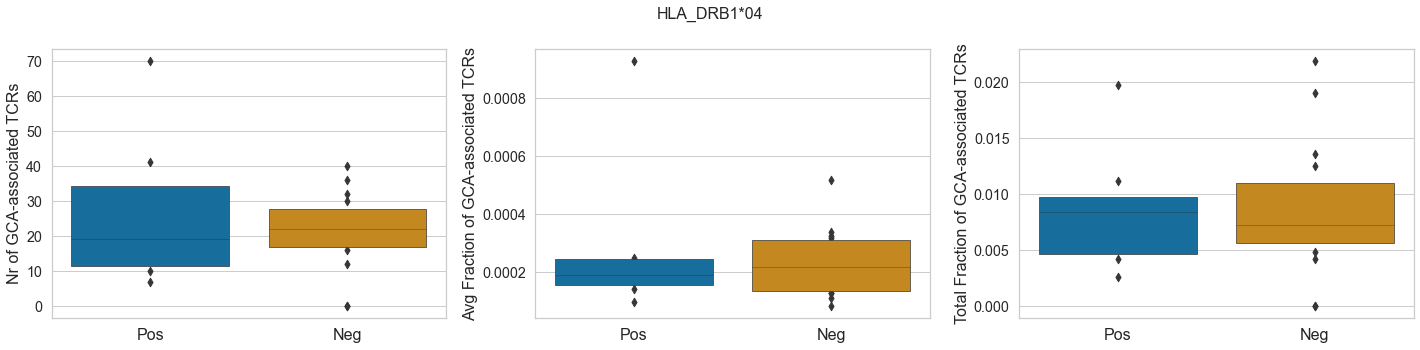

In [30]:
HLA_DRB1_data = hla_data[hla_data['HLA'] == 'HLA_DRB1*04'].T
HLA_DRB1_pos_subjects = [int(x) for x in HLA_DRB1_data[HLA_DRB1_data[332] == '1'].index]
HLA_DRB1_neg_subjects = [int(x) for x in HLA_DRB1_data[HLA_DRB1_data[332] == '0'].index]
nrs_pos, expansions_count_pos, expansions_frac_pos, total_expansions_frac_pos = get_dicts(HLA_DRB1_pos_subjects)
nrs_neg, expansions_count_neg, expansions_frac_neg, total_expansions_frac_neg = get_dicts(HLA_DRB1_neg_subjects)

fig, ax = plt.subplots(1, 3, sharex=True, sharey=False, figsize=(20, 5))
fig.suptitle('HLA_DRB1*04', fontsize=16)
labels, data = [*zip(*{'Pos':nrs_pos, 'Neg': nrs_neg}.items())]
splot1 = sns.boxenplot(data=data, ax=ax[0], width=0.8, linewidth = 0.7)
ax[0].set_xticklabels(labels, fontsize=16)
ax[0].set_ylabel('Nr of GCA-associated TCRs', fontsize=16)

labels, data = [*zip(*{'Pos':expansions_frac_pos, 'Neg': expansions_frac_neg}.items())]
splot3 = sns.boxenplot(data=data, ax=ax[1], width=0.8, linewidth = 0.7)
ax[1].set_xticklabels(labels, fontsize=16)
ax[1].set_ylabel('Avg Fraction of GCA-associated TCRs', fontsize=16)

labels, data = [*zip(*{'Pos':total_expansions_frac_pos, 'Neg': total_expansions_frac_neg}.items())]
splot3 = sns.boxenplot(data=data, ax=ax[2], width=0.8, linewidth = 0.7)
ax[2].set_xticklabels(labels, fontsize=16)
ax[2].set_ylabel('Total Fraction of GCA-associated TCRs', fontsize=16)

plt.tight_layout()
plt.savefig(os.path.join(basefolder, plotsfolder, 'HLA_DRB1.pdf'))

/Users/wbr/opt/anaconda3/envs/leeds/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/wbr/opt/anaconda3/envs/leeds/lib/python3.7/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


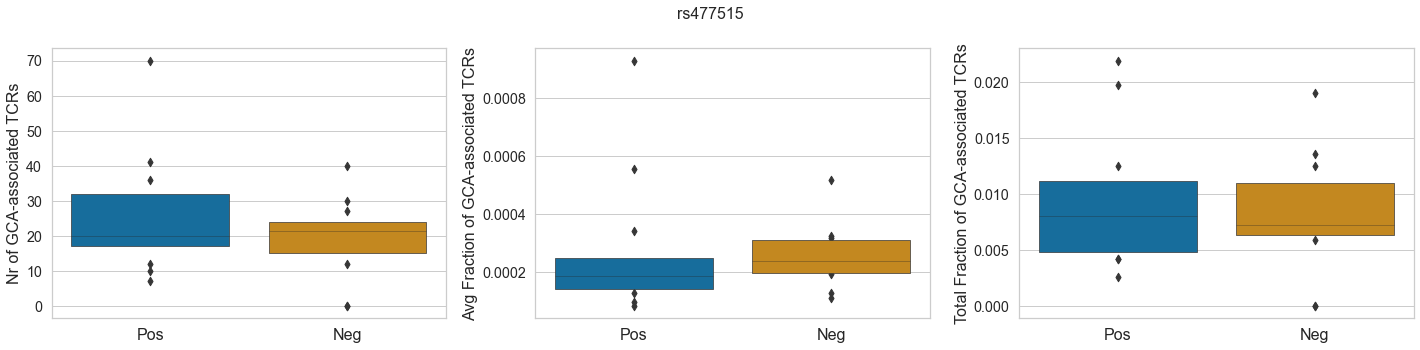

In [31]:
rs477515_pos = snp_data[snp_data['rs477515'] >= 1]
rs477515_pos_subjects = [int(x) for x in rs477515_pos['Subject ID']]
rs477515_neg = snp_data[snp_data['rs477515'] == 0]
rs477515_neg_subjects = [int(x) for x in rs477515_neg['Subject ID']]
nrs_pos, expansions_count_pos, expansions_frac_pos, total_expansions_frac_pos = get_dicts(rs477515_pos_subjects)
nrs_neg, expansions_count_neg, expansions_frac_neg, total_expansions_frac_neg = get_dicts(rs477515_neg_subjects)

fig, ax = plt.subplots(1, 3, sharex=True, sharey=False, figsize=(20, 5))
fig.suptitle('rs477515', fontsize=16)
labels, data = [*zip(*{'Pos':nrs_pos, 'Neg': nrs_neg}.items())]
splot1 = sns.boxenplot(data=data, ax=ax[0], width=0.8, linewidth = 0.7)
ax[0].set_xticklabels(labels, fontsize=16)
ax[0].set_ylabel('Nr of GCA-associated TCRs', fontsize=16)

labels, data = [*zip(*{'Pos':expansions_frac_pos, 'Neg': expansions_frac_neg}.items())]
splot3 = sns.boxenplot(data=data, ax=ax[1], width=0.8, linewidth = 0.7)
ax[1].set_xticklabels(labels, fontsize=16)
ax[1].set_ylabel('Avg Fraction of GCA-associated TCRs', fontsize=16)

labels, data = [*zip(*{'Pos':total_expansions_frac_pos, 'Neg': total_expansions_frac_neg}.items())]
splot3 = sns.boxenplot(data=data, ax=ax[2], width=0.8, linewidth = 0.7)
ax[2].set_xticklabels(labels, fontsize=16)
ax[2].set_ylabel('Total Fraction of GCA-associated TCRs', fontsize=16)
plt.tight_layout()
plt.savefig(os.path.join(basefolder, plotsfolder, 'rs477515.pdf'))

/Users/wbr/opt/anaconda3/envs/leeds/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/wbr/opt/anaconda3/envs/leeds/lib/python3.7/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


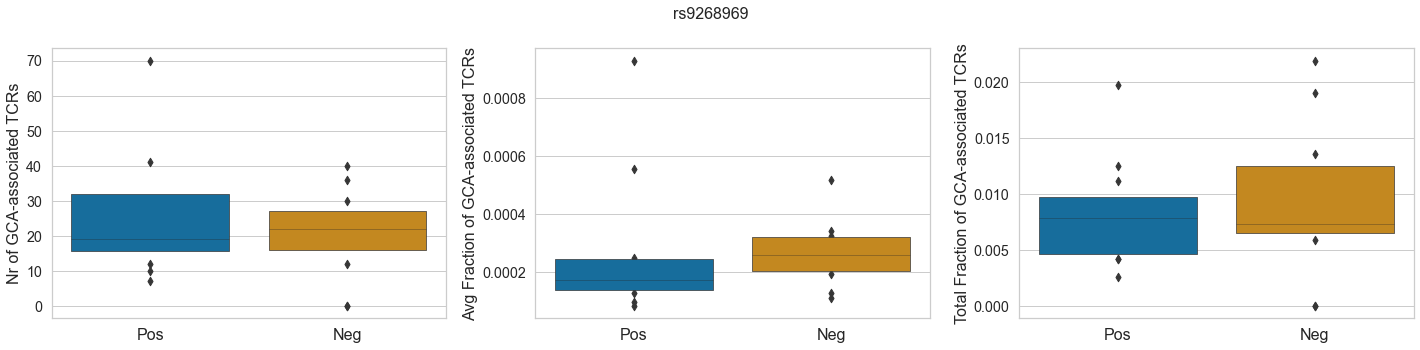

In [32]:
rs9268969_pos = snp_data[snp_data['rs9268969'] >= 1]
rs9268969_pos_subjects = [int(x) for x in rs9268969_pos['Subject ID']]
rs9268969_neg = snp_data[snp_data['rs9268969'] == 0]
rs9268969_neg_subjects = [int(x) for x in rs9268969_neg['Subject ID']]
nrs_pos, expansions_count_pos, expansions_frac_pos, total_expansions_frac_pos = get_dicts(rs9268969_pos_subjects)
nrs_neg, expansions_count_neg, expansions_frac_neg, total_expansions_frac_neg = get_dicts(rs9268969_neg_subjects)

fig, ax = plt.subplots(1, 3, sharex=True, sharey=False, figsize=(20, 5))
fig.suptitle('rs9268969', fontsize=16)
labels, data = [*zip(*{'Pos':nrs_pos, 'Neg': nrs_neg}.items())]
splot1 = sns.boxenplot(data=data, ax=ax[0], width=0.8, linewidth = 0.7)
ax[0].set_xticklabels(labels, fontsize=16)
ax[0].set_ylabel('Nr of GCA-associated TCRs', fontsize=16)

labels, data = [*zip(*{'Pos':expansions_frac_pos, 'Neg': expansions_frac_neg}.items())]
splot3 = sns.boxenplot(data=data, ax=ax[1], width=0.8, linewidth = 0.7)
ax[1].set_xticklabels(labels, fontsize=16)
ax[1].set_ylabel('Avg Fraction of GCA-associated TCRs', fontsize=16)

labels, data = [*zip(*{'Pos':total_expansions_frac_pos, 'Neg': total_expansions_frac_neg}.items())]
splot3 = sns.boxenplot(data=data, ax=ax[2], width=0.8, linewidth = 0.7)
ax[2].set_xticklabels(labels, fontsize=16)
ax[2].set_ylabel('Total Fraction of GCA-associated TCRs', fontsize=16)
plt.tight_layout()
plt.savefig(os.path.join(basefolder, plotsfolder, 'rs9268969.pdf'))

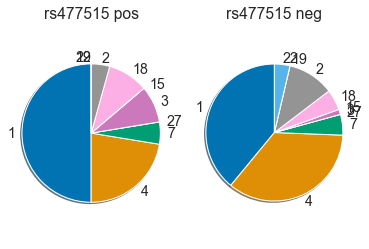

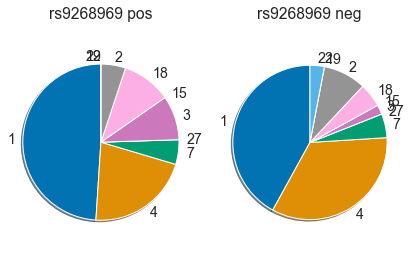

In [33]:
def get_cluster_ratios(ids,big_clusters):
    tcrs_subset = tcrs_to_analyze_clusters[tcrs_to_analyze_clusters['Subject_ID'].isin(ids)]
    #print(ids)
    sizes = [len(tcrs_subset[tcrs_subset['cluster'] == x])for x in big_clusters]
    return sizes

big_clusters = [1, 4, 7, 27, 3, 15, 18, 2, 19, 22]

sizes_h = get_cluster_ratios(rs477515_pos_subjects, big_clusters)
sizes_l = get_cluster_ratios(rs477515_neg_subjects, big_clusters)

fig1, ax = plt.subplots(1,2)
ax[0].pie(sizes_h, labels=big_clusters, shadow=True, startangle=90)
ax[0].axis('equal')
ax[1].pie(sizes_l, labels=big_clusters, shadow=True, startangle=90)
ax[1].axis('equal')
ax[0].set_title('rs477515 pos')
ax[1].set_title('rs477515 neg')

plt.savefig(os.path.join(basefolder, plotsfolder, 'pies_rs477515.pdf'))
plt.show()

sizes_h = get_cluster_ratios(rs9268969_pos_subjects, big_clusters)
sizes_l = get_cluster_ratios(rs9268969_neg_subjects, big_clusters)

fig1, ax = plt.subplots(1,2)
ax[0].pie(sizes_h, labels=big_clusters, shadow=True, startangle=90)
ax[0].axis('equal')
ax[1].pie(sizes_l, labels=big_clusters, shadow=True, startangle=90)
ax[1].axis('equal')
ax[0].set_title('rs9268969 pos')
ax[1].set_title('rs9268969 neg')
plt.tight_layout()
plt.savefig(os.path.join(basefolder, plotsfolder, 'pies_rs9268969.pdf'))

In [35]:
# HLAs of VDJ TCRs
subjects = [x for x in hla_data.columns][1:]
tcrs_with_hits = pd.read_csv(os.path.join(basefolder, 'tcr_specificity_hits.csv'))
human_hits = tcrs_with_hits[tcrs_with_hits['Hit Epitope Species'] == 'HomoSapiens']
HLAs = [('HLA_B*44:02', 'HLA-B*44:02'), ('HLA_A*01:01', 'HLA-A*01:01'),('HLA_A*02:01', 'HLA-A*02:01'), ('HLA_DRB1*01:01', 'HLA-DRB1*01:01:01')]
relevant_hlas_dict = {}
for HLA in HLAs:
    d = hla_data[hla_data['HLA'] == HLA[0]]
    subjects_pos = [column for column in subjects if int(d[d['HLA'] == HLA[0]][column].values[0]) >= 1]
    subjects_with_HLA = set([int(x) for x in subjects_pos])
    relevant_hlas_dict[HLA] = [int(x) for x in subjects_pos]
    tcrsA = [x for x in tcrs_with_hits[tcrs_with_hits['Hit MHC A'] == HLA[1]]['cdr3_b_aa']]
    tcrsB = [x for x in tcrs_with_hits[tcrs_with_hits['Hit MHC B'] == HLA[1]]['cdr3_b_aa']]
    tcrs = set(tcrsA).union(set(tcrsB))
    subjects_with_tcrs = [x for x in tcrs_to_analyze_clusters[tcrs_to_analyze_clusters['cdr3_b_aa'].isin(tcrs)]['Subject_ID']]
    print(tcrs, subjects_with_tcrs)
    print(len(subjects_with_tcrs), len(subjects_with_HLA), len(set(subjects_with_HLA).intersection(set(subjects_with_tcrs))))

{'CASSQAGGDTGELFF'} [12898]
1 7 0
{'CASSQDRGYGYTF'} [15272]
1 6 0
{'CASSYSGTGDYGYTF', 'CASSQDPGTSYNEQFF', 'CASSQDGTVYGYTF', 'CASSQDGAGGLGEQFF', 'CASSQGAGDEQFF', 'CASSQDSGGYNEQFF'} [8467, 15272, 15518, 18082, 8454, 8541]
6 13 1
{'CASSQERETQYF'} [19450]
1 5 0


/Users/wbr/opt/anaconda3/envs/leeds/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/wbr/opt/anaconda3/envs/leeds/lib/python3.7/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


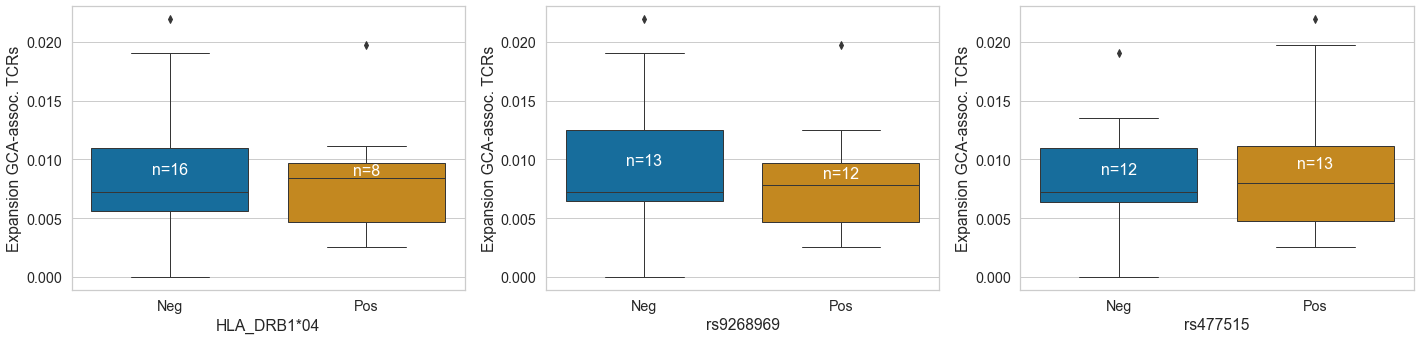

In [27]:
nrs_pos, expansions_count_pos, expansions_frac_pos, total_expansions_frac_pos1 = get_dicts(HLA_DRB1_pos_subjects)
nrs_neg, expansions_count_neg, expansions_frac_neg, total_expansions_frac_neg1 = get_dicts(HLA_DRB1_neg_subjects)
nrs_pos, expansions_count_pos, expansions_frac_pos, total_expansions_frac_pos2 = get_dicts(rs9268969_pos_subjects)
nrs_neg, expansions_count_neg, expansions_frac_neg, total_expansions_frac_neg2 = get_dicts(rs9268969_neg_subjects)
nrs_pos, expansions_count_pos, expansions_frac_pos, total_expansions_frac_pos3 = get_dicts(rs477515_pos_subjects)
nrs_neg, expansions_count_neg, expansions_frac_neg, total_expansions_frac_neg3 = get_dicts(rs477515_neg_subjects)


sns.set_theme(style="whitegrid", palette="colorblind", font_scale=1.3)
fig, ax = plt.subplots(1, 3, sharex=False, sharey=False, figsize=(20, 5))
#fig.suptitle('rs477515', fontsize=16)
labels, data = [*zip(*{'Neg': total_expansions_frac_neg1, 'Pos':total_expansions_frac_pos1}.items())]
splot1 = sns.boxplot(data=data, ax=ax[0], width=0.8, linewidth = 1)
ax[0].set_xticklabels(labels)
ax[0].set_ylabel('Expansion GCA-assoc. TCRs')
ax[0].set_xlabel('HLA_DRB1*04')

n_height = (np.quantile(data[0], 0.75)-np.median(data[0]))/2
ax[0].text(0, np.median(data[0])+n_height, 'n='+str(len(data[0])), ha='center', va='center', fontsize=16, color='white')
n_height = (np.quantile(data[1], 0.75)-np.median(data[1]))/2
ax[0].text(1, np.median(data[1])+n_height, 'n='+str(len(data[1])), ha='center', va='center', fontsize=16, color='white')


labels, data = [*zip(*{ 'Neg': total_expansions_frac_neg2, 'Pos':total_expansions_frac_pos2}.items())]
splot2 = sns.boxplot(data=data, ax=ax[1], width=0.8, linewidth = 1)
ax[1].set_xticklabels(labels)
ax[1].set_ylabel('Expansion GCA-assoc. TCRs')
ax[1].set_xlabel('rs9268969')

n_height = (np.quantile(data[0], 0.75)-np.median(data[0]))/2
ax[1].text(0, np.median(data[0])+n_height, 'n='+str(len(data[0])), ha='center', va='center', fontsize=16, color='white')
n_height = (np.quantile(data[1], 0.75)-np.median(data[1]))/2
ax[1].text(1, np.median(data[1])+n_height, 'n='+str(len(data[1])), ha='center', va='center', fontsize=16, color='white')


labels, data = [*zip(*{'Neg': total_expansions_frac_neg3,'Pos':total_expansions_frac_pos3}.items())]
splot3 = sns.boxplot(data=data, ax=ax[2], width=0.8, linewidth = 1)
ax[2].set_xticklabels(labels)
ax[2].set_ylabel('Expansion GCA-assoc. TCRs')
ax[2].set_xlabel('rs477515')

n_height = (np.quantile(data[0], 0.75)-np.median(data[0]))/2
ax[2].text(0, np.median(data[0])+n_height, 'n='+str(len(data[0])), ha='center', va='center', fontsize=16, color='white')
n_height = (np.quantile(data[1], 0.75)-np.median(data[1]))/2
ax[2].text(1, np.median(data[1])+n_height, 'n='+str(len(data[1])), ha='center', va='center', fontsize=16, color='white')


plt.tight_layout()
plt.savefig(os.path.join(basefolder, plotsfolder, 'hla.pdf'))